In [9]:
#%pip install cartopy

In [2]:
import numpy as np
import random
from Graphs.RandomGraph import RandomGraph
from Graphs.MapGraph import MapGraph
random.seed(0)
np,random.seed(0)

        
cities = [
    "Boos", "Rouen", "Franqueville-Saint-Pierre", "Le Mesnil-Esnard", "Saint-Etienne-Du-Rouvray",
    "Montmain", "Bois-Guillaume", "Bonsecours", "Sotteville-lès-Rouen", "Mont-Saint-Aignan",
    "Le Grand-Quevilly", "Le Petit-Quevilly", "Canteleu", "Déville-lès-Rouen", "Darnétal",
    "Elbeuf", "Oissel", "Maromme", "Cléon", "Saint-Aubin-lès-Elbeuf", "Saint-Aubin-Celloville",
    "Saint-Martin-du-Vivier", "Saint-Jacques-sur-Darnétal", "Saint-Léger-du-Bourg-Denis",
    "Saint-Pierre-de-Manneville", "Saint-Pierre-de-Varengeville", "Saint-Martin-de-Boscherville",
    "Saint-Aubin-Épinay", "Saint-Paër", "Isneauville", "Hénouville", "Houppeville", "Malaunay",
    "Jumièges", "La Bouille", "Duclair", "Notre-Dame-de-Bondeville", "Petit-Couronne"
]
# cities = ["Rouen", "Saint-Etienne-Du-Rouvray","Mont-Saint-Aignan", "Bonsecours"]

# cities = ["Bouffry","Yermenonville","Valennes","Mondoubleau","Arquenay", "Nantes", "Boos", "La Rochelle", "Bordeaux", "Toulouse", "Montpellier", "Marseille", "Lyon", "Le Mans", "Riom","Bergerac","Vic-sur-Cère", "Clermont-Ferrand","Sucé-sur-Erdre", "Rezé","Rieux"]
#cities = ["Marseille", "Rouen", "Lille", "Quimper", "Colmar", "Paris", "Bayonne", "Toulouse"]
#create real graph
# graph = MapGraph(cities=cities,start_city="Rouen")
graph = RandomGraph(node_number=200,min_weight=1,max_weight=100)
graph.plot_graph()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


KeyboardInterrupt: 

In [11]:
#Filtration
edge_blocking_percentage = 0
edge_costly_percentage = 0
graph.apply_edge_blocking(percentage=edge_blocking_percentage)
graph.apply_edge_costly(percentage=edge_costly_percentage)

if(edge_blocking_percentage > 0 or edge_costly_percentage > 0):
    graph.plot_graph()

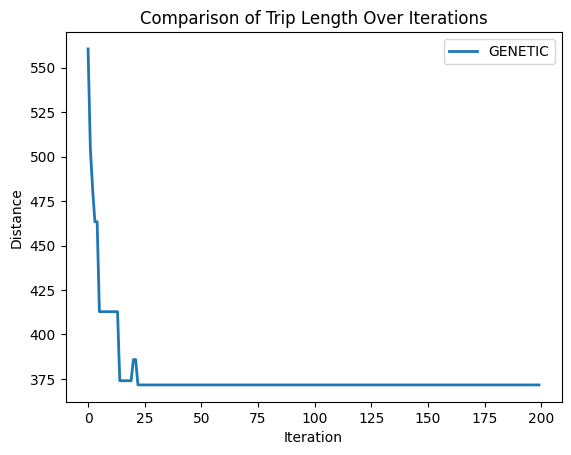

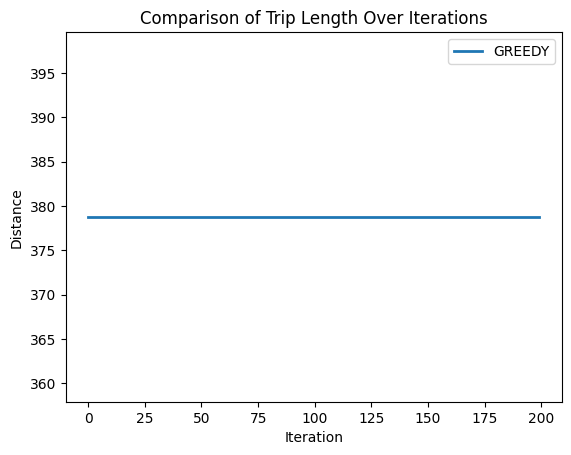

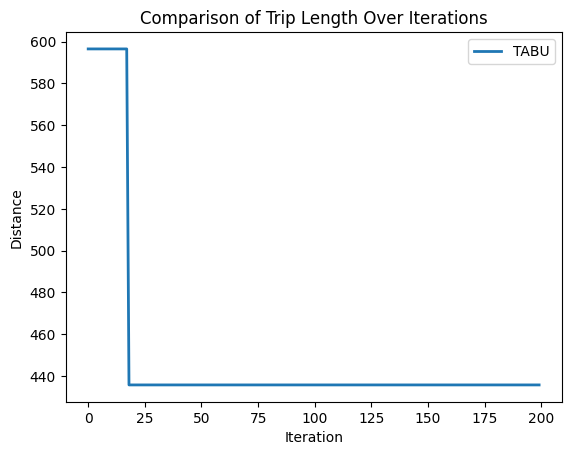

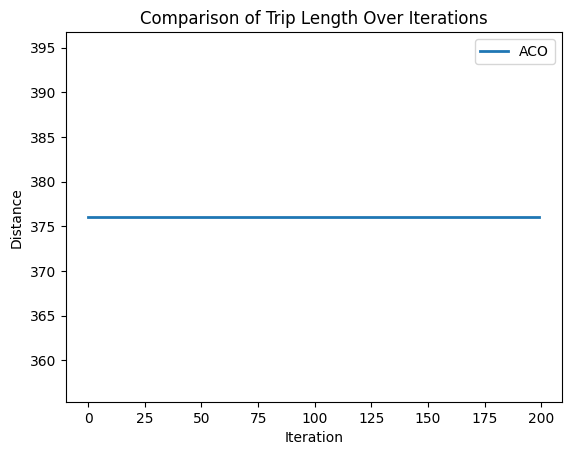

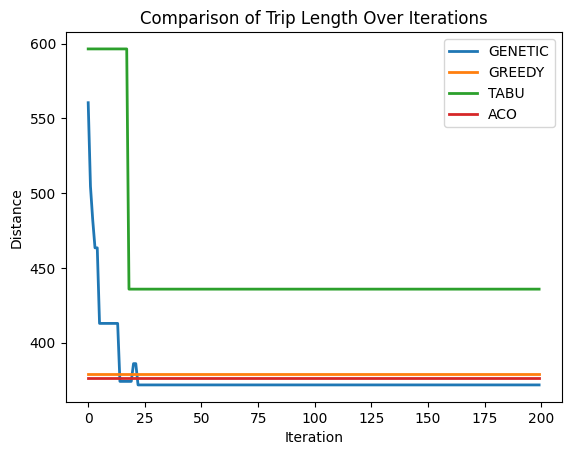

In [21]:
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Algorithms.Greedy.GreedyAlgo import GreedyAlgo
from Algorithms.Tabu.TabuAlgo import TabuAlgo
from Algorithms.Genetic.GeneticAlgo import GeneticAlgo
from utils.plot import Plot

def run_algorithm(graph,algorithm,plot_path = True):
    algorithm.run()
    print(f"Algorithm {algorithm.name} : \n")
    vehicles_paths = {i + 1: path for i, path in enumerate(algorithm.paths)}
    current_path_results = {}
    algorithms_path_results = {}
    current_path_results[algorithm.name] = vehicles_paths
    algorithms_path_results[algorithm.name] = current_path_results[algorithm.name]
    
    # Print the best path found and the total distance
    print(f"Execution time : {algorithm.execution_time} s ({algorithm.execution_time * 1000} ms)")
    print(f"Best paths: {algorithm.paths}")
    print(f"Total distance: { algorithm.distance}")
    print(f"Distance per vehicles  : {algorithm.distance_per_vehicles}")
    print(f"Average distance for each vehicles : {algorithm.distance_average_per_vehicles}")
    print(f"Standard deviation distance for each vehicles : {algorithm.distance_standard_deviation_per_vehicles}")
    print(f"Number of iterations needed to find the solution : {algorithm.iterations_needed}")
    print(f"Total number of iterations : {algorithm.total_interations_realized}")
    if plot_path:
        graph.plot_graph(current_path_results)

def time_over_iterations_comparison(graph,algorithms, max_iterations, step = 1, single_plot = True, full_plot = True):
    time_results = {algo.name: [] for algo in algorithms}
    iteration_range = range(1, max_iterations + 1, step)
    for algorithm in algorithms:
        algorithm.convergence_threshold = 0
        for i in iteration_range:
            algorithm.max_iterations = i
            algorithm.min_iterations = i
            algorithm.run()
            time_results[algorithm.name].append(algorithm.execution_time)
            print(f"{algorithm.name} - Iterations: {i} of {max_iterations}, Time: {algorithm.execution_time}s")
        if single_plot:
            single_time_result = {}
            single_time_result[algorithm.name] = time_results[algorithm.name]
            Plot.plot_time_over_iterations_comparison(single_time_result,step)
    if full_plot:
        Plot.plot_time_over_iterations_comparison(time_results,step)

def distance_over_iterations_comparison(graph,algorithms, single_plot = True, full_plot = True, plot_path_single = True, full_path_plot = False):
    algorithms_distance_results = {}
    for algorithm in algorithms:
        algorithm.run()
        algorithms_distance_results[algorithm.name] = algorithm.distance_history
        if single_plot:
            single_distance_results = {}
            single_distance_results[algorithm.name] = algorithm.distance_history
            Plot.plot_distance_over_iterations_comparison(single_distance_results)
    if full_plot:
        Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)

# def run_algorithms(graph, algorithms):
#     for algorithm in algorithms:
#         run_algorithm(graph,algorithm)
#     Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)
#     graph.plot_graph(algorithms_path_results)
min_iterations = 200
max_iterations = 200
convergence_threshold = 0
num_vehicles = 2
ACO = AcoAlgo(graph,"ACO",num_vehicles,100,0.5,1,2,min_iterations,max_iterations,convergence_threshold)
GREEDY = GreedyAlgo(graph,"GREEDY",num_vehicles,min_iterations,max_iterations,convergence_threshold)
TABU = TabuAlgo(graph,"TABU",num_vehicles,10,min_iterations,max_iterations,convergence_threshold)
GENETIC = GeneticAlgo(graph, "GENETIC",num_vehicles,20,min_iterations=min_iterations, max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [GENETIC,GREEDY,TABU,ACO]
# run_algorithms(graph= graph,algorithms=algorithms)
# graph = RandomGraph(node_number=10,min_weight=1,max_weight=100)
# time_over_iterations_comparison(graph,algorithms,max_iterations=1000, step=100)
distance_over_iterations_comparison(graph,algorithms)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from Algorithms.ACO.AcoAlgo import AcoAlgo
from Algorithms.Greedy.GreedyAlgo import GreedyAlgo
from Algorithms.Tabu.TabuAlgo import TabuAlgo
from Algorithms.Genetic.GeneticAlgo import GeneticAlgo
from utils.plot import Plot
def graph_generator(
    node=2,
    min_weight=1,
    max_weight=100,
    blocked_edge_percentage=0,
    costly_edge_percentage=0
):
    # Génère un graphe aléatoire avec les poids spécifiés
    graph = RandomGraph(
        node_number=node,
        min_weight=min_weight,
        max_weight=max_weight
    )

    # Applique les filtrages selon les pourcentages spécifiés
    graph.apply_edge_blocking(percentage=blocked_edge_percentage)
    graph.apply_edge_costly(percentage=costly_edge_percentage)

    return graph

def distance_boxplot_over_repeats(
    graph_generator,
    algorithm_factories,
    repeat=10,
    node_number=30,
    min_weight=1,
    max_weight=100,
    min_iterations=200,
    max_iterations=200,
    convergence_threshold=0
):
    results = {name: [] for name in algorithm_factories.keys()}

    for i in range(repeat):
        print(f"\nRépétition {i+1}/{repeat}")
        graph = graph_generator(node=node_number, min_weight=min_weight, max_weight=max_weight)

        for name, factory in algorithm_factories.items():
            try:
                algo = factory(graph)
                algo.run()
                final_distance = algo.distance_history[-1]  # dernière valeur de l'historique
                results[name].append(final_distance)
                print(f"{name}: {final_distance:.2f}")
            except Exception as e:
                print(f"[Erreur] {name} : {e}")
                results[name].append(None)

    # Nettoyage des None
    for name in results:
        results[name] = [d for d in results[name] if d is not None]

    # Boîte à moustaches avec seaborn
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=[results[name] for name in results], notch=True)
    plt.xticks(ticks=range(len(results)), labels=list(results.keys()))
    plt.title("Distribution des distances finales par algorithme")
    plt.ylabel("Distance finale")
    plt.grid(True)
    plt.tight_layout()
    plt.show()




min_iterations = 10
max_iterations = 200
convergence_threshold = 0
num_vehicles = 2

algorithm_factories = {
    "ACO": lambda graph: AcoAlgo(graph, "ACO", num_vehicles, 100, 0.5, 1, 2, min_iterations, max_iterations, convergence_threshold),
    "TABU": lambda graph: TabuAlgo(graph, "TABU", num_vehicles, 10, min_iterations, max_iterations, convergence_threshold),
    "GENETIC": lambda graph: GeneticAlgo(graph, "GENETIC", num_vehicles, 20, min_iterations, max_iterations, convergence_threshold)
}

distance_boxplot_over_repeats(
    graph_generator=graph_generator,
    algorithm_factories=algorithm_factories
)


Répétition 1/10
ACO: 305.93
TABU: 1233.89
GENETIC: 929.64

Répétition 2/10
ACO: 330.52
TABU: 1174.39
GENETIC: 1058.43

Répétition 3/10
ACO: 318.41
TABU: 1324.03
GENETIC: 1183.90

Répétition 4/10
ACO: 420.19
TABU: 1247.32
GENETIC: 1094.94

Répétition 5/10
ACO: 316.96
